In [115]:
import pandas as pd
import datetime
import math
import numpy as np
import pandas_datareader.data as web
from pandas import Series, DataFrame
from sklearn import preprocessing


start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 10, 15)

df = web.DataReader("DMP.AX", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-08,49.970001,47.84,49.529999,48.009998,631193.0,48.009998
2019-10-09,48.080002,47.09,47.500000,47.660000,405358.0,47.660000
2019-10-10,49.349998,47.50,47.599998,48.930000,364257.0,48.930000
2019-10-13,49.790001,48.93,49.500000,49.299999,390776.0,49.299999
2019-10-15,49.330002,48.68,48.869999,48.860001,330121.0,48.860001


In [116]:
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-13', '2019-01-14',
               ...
               '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-06',
               '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10',
               '2019-10-13', '2019-10-15'],
              dtype='datetime64[ns]', name='Date', length=199, freq=None)

<BarContainer object of 199 artists>

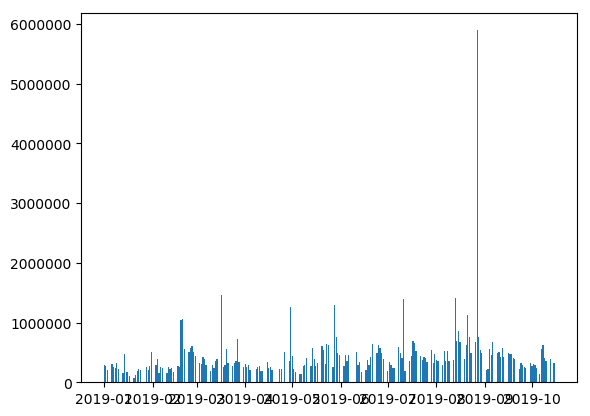

In [117]:
import matplotlib.pyplot as plt

s = df['Volume']
a = df.index

plt.figure()

plt.bar(a,s)

In [75]:
web.DataReader(["DMP.AX","ALG.AX","LNK.AX","PGH.AX","WPL.AX"], 'yahoo', start, end)['Volume']

Symbols,ALG.AX,DMP.AX,LNK.AX,PGH.AX,WPL.AX
Date,,,,,
2019-10-01,685781,273058,2640572,2181287,2820833
2019-10-02,957459,303299,2448713,663816,3137279
2019-10-03,1022093,294250,4823977,1479283,4382148
2019-10-04,936088,244477,1876565,824510,2193803
2019-10-06,229440,135288,923600,593881,2842879
2019-10-07,600130,557275,1766399,685365,1899383
2019-10-08,1265274,631193,2116244,844187,2947015
2019-10-09,1366587,405358,1762602,691439,1859179
2019-10-10,725362,364257,1452965,616826,3588261


In [76]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

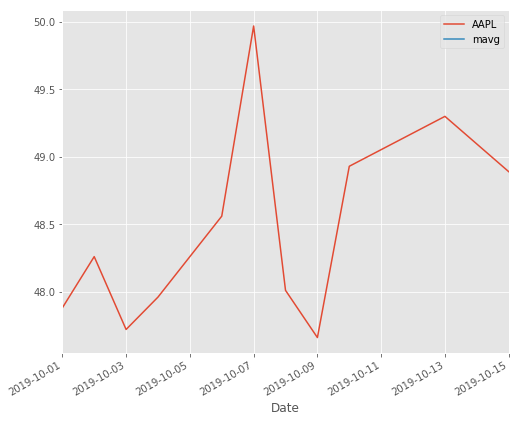

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

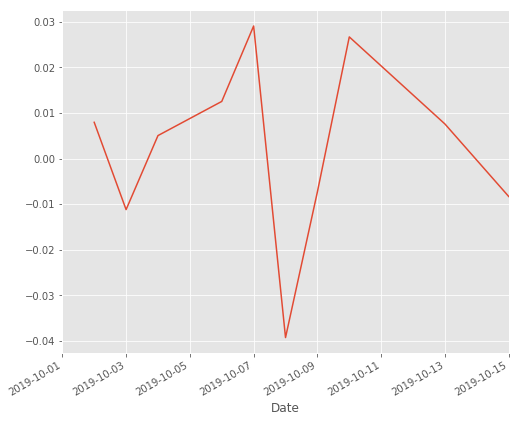

In [78]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [79]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [80]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

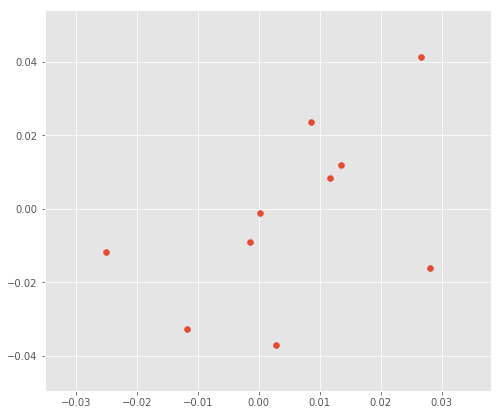

In [81]:
plt.scatter(retscomp.AAPL, retscomp.GE)


In [82]:
retscomp.GE

Date
2019-09-30         NaN
2019-10-01   -0.036913
2019-10-02   -0.011614
2019-10-03    0.023502
2019-10-04   -0.016074
2019-10-07   -0.001167
2019-10-08   -0.032710
2019-10-09    0.008454
2019-10-10    0.011976
2019-10-11    0.041420
2019-10-14   -0.009091
Name: GE, dtype: float64

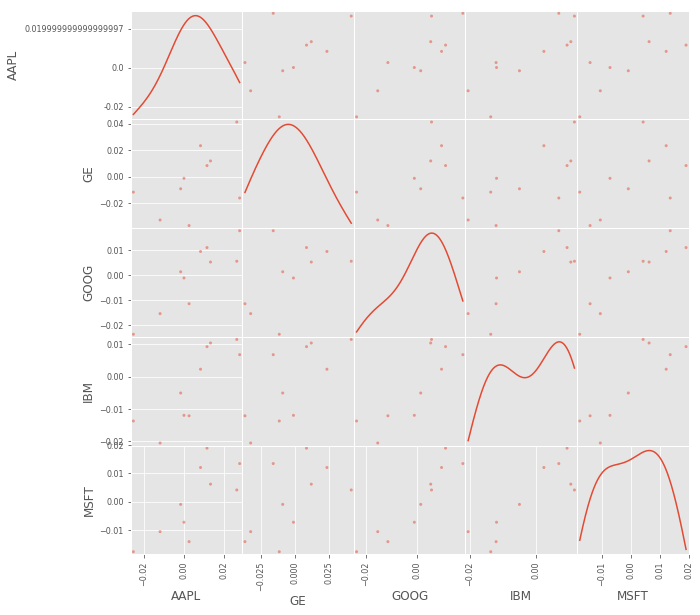

In [83]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

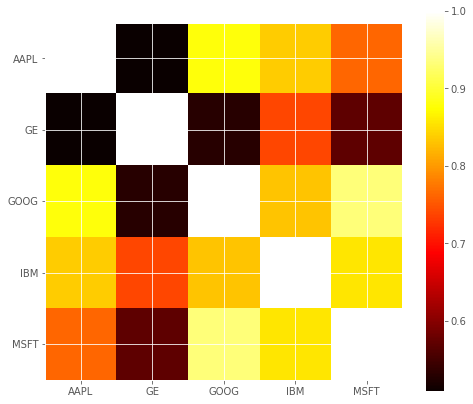

In [84]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

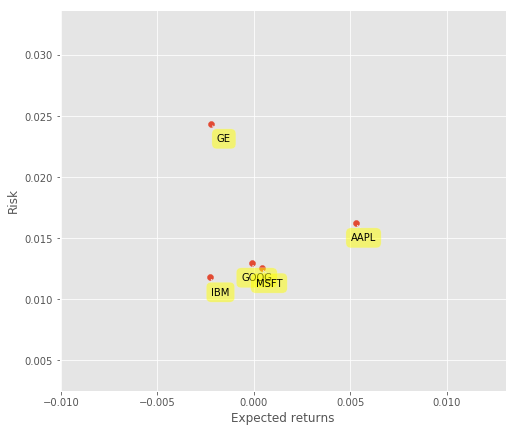

In [85]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [86]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg["HL_PCT"] = (df["High"] - df["Low"]) / df["Close"] * 100.0
dfreg["PCT_change"] = (df["Close"] - df["Open"]) / df["Open"] * 100.0

In [90]:
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [91]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [93]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2019-10-01,47.880001,273058,3.111942,2.702707,48.259998
2019-10-02,48.259998,303299,2.279325,0.962341,47.720001
2019-10-03,47.720001,294250,1.927917,0.378629,47.959999
2019-10-04,47.959999,244477,1.959964,0.334728,48.560001
2019-10-06,48.560001,135288,1.832783,1.166670,49.970001
